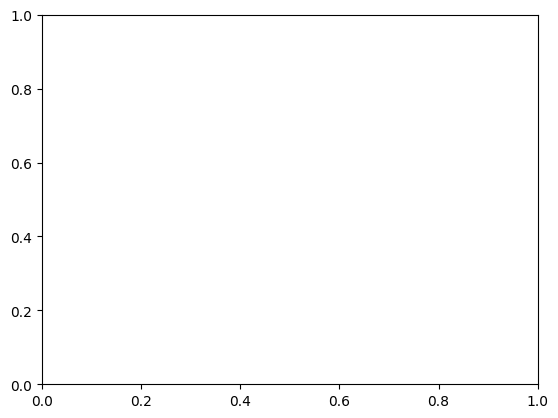

d:\books\cellular-automata-book\.env\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class ConwayGame:
    def __init__(self, toroidal=True, width=32, height=32, grid_size=1, order_mean=0.5, order_std=0.1):
        self.WIDTH, self.HEIGHT = width, height
        self.GRID_SIZE = grid_size
        self.GRID_WIDTH, self.GRID_HEIGHT = self.WIDTH // self.GRID_SIZE, self.HEIGHT // self.GRID_SIZE
        self.grid = np.zeros((self.GRID_WIDTH, self.GRID_HEIGHT), dtype=bool)
        self.metagrid = []
        self.order_mean = order_mean
        self.order_std = order_std
        self.toroidal = toroidal

    def randomize_grid(self):
        probability_of_one = np.clip(np.random.normal(self.order_mean, self.order_std), 0, 1)
        for i in range(0, self.GRID_WIDTH):
            for j in range(0, self.GRID_HEIGHT):
                self.grid[i, j] = random.random() < probability_of_one

    def randomize_grid_uniform(self, probability_of_one):
        for i in range(0, self.GRID_WIDTH):
            for j in range(0, self.GRID_HEIGHT):
                self.grid[i, j] = random.random() < probability_of_one

    def update_grid(self):
        new_grid = np.copy(self.grid)
        for i in range(self.GRID_WIDTH):
            for j in range(self.GRID_HEIGHT):
                neighbors = sum(
                    self.grid[(i + x) % self.GRID_WIDTH, (j + y) % self.GRID_HEIGHT]
                    for x in [-1, 0, 1] for y in [-1, 0, 1]
                ) - self.grid[i, j]
                if self.grid[i, j]:
                    if neighbors < 2 or neighbors > 3:
                        new_grid[i, j] = False
                else:
                    if neighbors == 3:
                        new_grid[i, j] = True
        self.grid = new_grid

    def update_grid_zeros_BC(self):
        new_grid = np.zeros_like(self.grid)  # Initialize new grid with zeros
        for i in range(self.GRID_WIDTH):
            for j in range(self.GRID_HEIGHT):
                neighbors = sum(
                    self.grid[x, y]  # Access neighbors directly
                    for x in range(max(0, i - 1), min(self.GRID_WIDTH, i + 2))
                    for y in range(max(0, j - 1), min(self.GRID_HEIGHT, j + 2))
                ) - self.grid[i, j]
                if self.grid[i, j]:
                    if neighbors < 2 or neighbors > 3:
                        new_grid[i, j] = False
                    else:
                        new_grid[i, j] = True
                else:
                    if neighbors == 3:
                        new_grid[i, j] = True
        self.grid = new_grid

    def run(self, num_iterations=2):
        self.metagrid = []
        for _ in range(num_iterations):
            self.metagrid.append(np.copy(self.grid))
            if self.toroidal:
                self.update_grid()
            else:
                self.update_grid_zeros_BC()
        return np.array(self.metagrid)

    def get_state_as_string(self, grid):
        return ''.join(str(int(cell)) for row in grid for cell in row)
    
    def set_grid_from_string(self, grid_string):
        if len(grid_string) != self.GRID_WIDTH * self.GRID_HEIGHT:
            raise ValueError("The length of the input string does not match the grid dimensions.")
        grid_array = np.array([int(char) for char in grid_string]).reshape((self.GRID_WIDTH, self.GRID_HEIGHT))
        self.grid = grid_array.astype(bool)

    def generate_sets(self, A=100, N=32, I=2, s=.5, e=.5):
        self.WIDTH = self.HEIGHT = N
        self.GRID_WIDTH, self.GRID_HEIGHT = self.WIDTH // self.GRID_SIZE, self.HEIGHT // self.GRID_SIZE
        self.grid = np.zeros((self.GRID_WIDTH, self.GRID_HEIGHT), dtype=bool)

        data = []
        probabilities = np.linspace(s, e, A)
        for probability_of_one in probabilities:
            self.randomize_grid_uniform(probability_of_one)
            self.run(num_iterations=I)
            metagrid = self.metagrid
            states = [self.get_state_as_string(metagrid[i]) for i in range(I)]
            data.append(states)
        return np.array(data)

    def initialize_pattern(self, pattern_name):
        self.grid = np.zeros((self.GRID_WIDTH, self.GRID_HEIGHT), dtype=bool)
        if pattern_name == "glider_gun":
            self.place_glider_gun()
        elif pattern_name == "cloverleaf":
            self.place_cloverleaf()
        elif pattern_name == "hammerhead_spaceship":
            self.place_hammerhead_spaceship()
        elif pattern_name == "blinkers":
            self.place_blinkers()
        elif pattern_name == "r_pentomino":
            self.place_r_pentomino()
        elif pattern_name == "gliders":
            self.place_gliders()
        else:
            print("inputted pattern not found")
            exit()

    def place_glider_gun(self):
        pattern = [
            "........................O...........",
            "......................O.O...........",
            "............OO......OO............OO",
            "...........O...O....OO............OO",
            "OO........O.....O...OO..............",
            "OO........O...O.OO....O.O...........",
            "..........O.....O.......O...........",
            "...........O...O....................",
            "............OO......................",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i + 5][j + 5] = (cell == 'O')

    def place_cloverleaf(self):
        pattern = [
            ".......................",
            "........OO...OO........",
            ".......O..O.O..O.......",
            ".......O.OO.OO.O.......",
            "......OO.......OO......",
            "........O.O.O.O.......",
            "......OO.......OO......",
            ".......O.OO.OO.O.......",
            ".......O..O.O..O.......",
            "........OO...OO........",
            ".......................",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i + 5][j + 5] = (cell == 'O')

    def place_hammerhead_spaceship(self):
        pattern = [
            "......................",
            "..OOOOO...............",
            "..O....O.......OO.....",
            "..O...........OO.OOO..",
            "...O.........OO.OOOO..",
            ".....OO...OO.OO..OO...",
            ".......O....O..O......",
            "........O.O.O.O.......",
            ".........O............",
            ".........O............",
            "........O.O.O.O.......",
            ".......O....O..O......",
            ".....OO...OO.OO..OO...",
            "...O.........OO.OOOO..",
            "..O...........OO.OOO..",
            "..O....O.......OO.....",
            "..OOOOO...............",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i + 5][j + 5] = (cell == 'O')

    def place_blinkers(self):
        pattern = [
            "OOO..............",
            ".................",
            ".................",
            ".......OOO.......",
            ".................",
            ".................",
            ".................",
            ".......OOO.......",
            "...............O.",
            "...............O.",
            "...............O.",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i][j] = (cell == 'O')
    def place_r_pentomino(self):
        pattern = [
            ".OO..............",
            "OO...............",
            ".O...............",
            ".................",
            ".................",
            ".................",
            ".................",
            ".................",
            ".................",
            ".................",
            ".................",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i][j] = (cell == 'O')
    def place_gliders(self):
        pattern = [
            ".................",
            ".................",
            ".................",
            ".................",
            ".......OO........",
            "........OO.......",
            ".......O.........",
            ".................",
            "..........O......",
            "..........O.O....",
            "..........OO.....",
        ]
        for i, row in enumerate(pattern):
            for j, cell in enumerate(row):
                self.grid[i + 5][j + 5] = (cell == 'O')

    def run_and_save(self, num_iterations, save_folder):
        for index in range(num_iterations):
            if self.toroidal:
                self.update_grid()
            else:
                self.update_grid_zeros_BC()
            save_path = os.path.join(save_folder, f'grid_{index}.npy')
            np.save(save_path, self.grid)

    def create_animation(self, num_iterations, interval=8.35):
        fig, ax = plt.subplots()

        def update(frame):
            ax.clear()
            ax.imshow(self.metagrid[frame], cmap='binary')
            ax.set_title(f"Iteration {frame+1}")

        ani = FuncAnimation(fig, update, frames=num_iterations, interval=interval, repeat=False)
        plt.show()


save_path = "."

game = ConwayGame()
game.__init__(width=32,height=32)
game.initialize_pattern("hammerhead_spaceship")
game.run(num_iterations=300)
game.create_animation(num_iterations=300,interval=16.7)
